In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
# Load the dataset
df = pd.read_csv('SCHGROUP_data.csv')

ModuleNotFoundError: No module named 'seaborn'

#### Which department had the most billable hours in 2019, 2020, and 2021?


In [15]:
# Calculate the sum of billable hours for each department in each year
billable_hours = df.groupby(['DeptName', 'Date'])['Hours'].sum()

# Find the department with the highest billable hours for each year
highest_dept_hours = billable_hours.groupby('Date').idxmax()

print(highest_dept_hours)

Date
1/1/2019      ( No Selection, 1/1/2019)
1/1/2020      ( No Selection, 1/1/2020)
1/1/2021      ( No Selection, 1/1/2021)
1/10/2019    ( No Selection, 1/10/2019)
1/10/2020    ( No Selection, 1/10/2020)
                        ...            
9/8/2020      ( No Selection, 9/8/2020)
9/8/2021      ( No Selection, 9/8/2021)
9/9/2019      ( No Selection, 9/9/2019)
9/9/2020      ( No Selection, 9/9/2020)
9/9/2021      ( No Selection, 9/9/2021)
Name: Hours, Length: 1096, dtype: object


#### Which client had the highest total billable amount in each year?


In [16]:
# Calculate the sum of total amount for each client in each year
total_amount = df.groupby(['ClientNum', 'Date'])['TotalAmount'].sum()

# Find the client with the highest total amount for each year
highest_client_amount = total_amount.groupby('Date').idxmax()

print(highest_client_amount)

TypeError: reduction operation 'argmax' not allowed for this dtype

#### What is the average billable rate for each department over the three years?

In [ ]:
# Calculate the mean billable rate for each department in each year
mean_billable_rate = df.groupby(['DeptName', 'Date'])['BillRate'].mean()

# Calculate the overall mean billable rate for each department
overall_mean_billable_rate = mean_billable_rate.groupby('DeptName').mean()

print(overall_mean_billable_rate)

#### How many different clients used the company's services over the three years?


In [18]:
# Count the number of unique clients in the dataset
num_clients = len(df['ClientNum'].unique())

print(num_clients)

3049


#### Which employee billed the most hours in each year?


In [20]:
# Calculate the sum of billable hours for each employee in each year
employee_hours = df.groupby(['EmployeeId', 'Date'])['Hours'].sum()

# Find the employee with the highest billable hours for each year
highest_employee_hours = employee_hours.groupby('Date').idxmax()

print(highest_employee_hours.head(30))

Date
1/1/2019        (64, 1/1/2019)
1/1/2020      (1022, 1/1/2020)
1/1/2021       (616, 1/1/2021)
1/10/2019       (5, 1/10/2019)
1/10/2020    (1031, 1/10/2020)
1/10/2021     (661, 1/10/2021)
1/11/2019      (64, 1/11/2019)
1/11/2020    (1031, 1/11/2020)
1/11/2021     (661, 1/11/2021)
1/12/2019     (226, 1/12/2019)
1/12/2020    (1054, 1/12/2020)
1/12/2021     (661, 1/12/2021)
1/13/2019     (226, 1/13/2019)
1/13/2020    (1040, 1/13/2020)
1/13/2021     (661, 1/13/2021)
1/14/2019      (64, 1/14/2019)
1/14/2020    (1040, 1/14/2020)
1/14/2021     (661, 1/14/2021)
1/15/2019      (64, 1/15/2019)
1/15/2020    (1040, 1/15/2020)
1/15/2021     (661, 1/15/2021)
1/16/2019      (64, 1/16/2019)
1/16/2020    (1040, 1/16/2020)
1/16/2021     (719, 1/16/2021)
1/17/2019     (110, 1/17/2019)
1/17/2020    (1040, 1/17/2020)
1/17/2021     (661, 1/17/2021)
1/18/2019     (110, 1/18/2019)
1/18/2020    (1040, 1/18/2020)
1/18/2021     (675, 1/18/2021)
Name: Hours, dtype: object


#### Which department had the highest total billable amount in each year?


In [21]:
# Calculate the sum of total amount for each department in each year
total_amount = df.groupby(['DeptName', 'Date'])['TotalAmount'].sum()

# Find the department with the highest total amount for each year
highest_dept_amount = total_amount.groupby('Date').idxmax()

print(highest_dept_amount)

TypeError: reduction operation 'argmax' not allowed for this dtype

#### What is the overall trend in billable hours and billable amount over the three years?


Matplotlib created a temporary config/cache directory at /var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/matplotlib-eikhlzmg because the default path (/Users/Yousefmacer/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


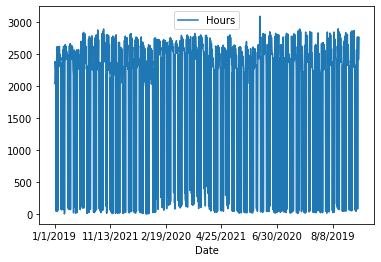

In [22]:
import matplotlib.pyplot as plt

# Calculate the sum of billable hours and total amount for each year
yearly_summary = df.groupby('Date').agg({'Hours': 'sum', 'TotalAmount': 'sum'})

# Plot the trend in billable hours and total amount over the three years
yearly_summary.plot(kind='line')
plt.show()


#### What is the total amount billed by each employee in each year?


In [23]:
# Calculate the sum of total amount for each employee in each year
employee_amount = df.groupby(['EmployeeId', 'Date'])['TotalAmount'].sum()

print(employee_amount)

EmployeeId  Date     
0           1/10/2019     $-    $-    $-    $-    $-    $-   $2,359.50 ...
            1/18/2019            $-    $-    $-    $-    $-    $-    $-   
            1/2/2019     $536.25 $124.68 $402.19 $1,930.50  $-   $201.0...
            1/25/2019     $-    $-    $-    $-    $-    $-    $-    $- ...
            1/28/2019     $-    $-    $-   $81.78  $-    $-    $-    $-...
                                               ...                        
1515        12/4/2020                            $-    $-   $126.02  $-   
            12/6/2020                                                $-   
            12/8/2020                                                $-   
1516        12/4/2020            $-    $-    $-   $804.38 $482.63 $482.63 
            12/8/2020     $-    $-   $209.14  $-    $-    $-    $-    $...
Name: TotalAmount, Length: 35577, dtype: object


#### What is the distribution of billable rates across all departments?


In [28]:
!pip install seaborn


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [25]:


# Plot the distribution of billable rates across all departments
sns.histplot(data=df, x='BillRate', hue='DeptName')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 8.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 9.0 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 9.2 MB/s eta 0:00:00:00:010:01m
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_10_9_x86_64.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00ta 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.1 MB/s eta 0:00:00:00:010:01m
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 8.2 M

ModuleNotFoundError: No module named 'seaborn'

#### What is the average billable rate for each client over the three years?


In [ ]:
# Calculate the mean billable rate for each client in each year
mean_billable_rate = df.groupby(['ClientNum', 'Date'])['BillRate'].mean()

print(mean_billable_rate)


#### Clients who consistently have high or low billable rates?


In [ ]:
# Calculate the standard deviation of billable rates for each client over the three years
std_billable_rate = df.groupby(['ClientNum'])['BillRate'].std()

# Find the clients with the highest and lowest standard deviation
highest_std_clients = std_billable_rate.nlargest(5)
lowest_std_clients = std_billable_rate.nsmallest(5)

print(highest_std_clients)
print(lowest_std_clients)


#### Departments or employees that consistently underperform in terms of billable hours or billable amount?


In [ ]:
# Calculate the mean billable hours and total amount for each department and employee
dept_hours_amount = df.groupby(['DeptName'])[['Hours', 'TotalAmount']].mean()
employee_hours_amount = df.groupby(['EmployeeId'])[['Hours', 'TotalAmount']].mean()

# Find the departments and employees with the lowest mean billable hours and total amount
lowest_dept_hours = dept_hours_amount.nsmallest(5, 'Hours')
lowest_dept_amount = dept_hours_amount.nsmallest(5, 'TotalAmount')
lowest_employee_hours = employee_hours_amount.nsmallest(5, 'Hours')
lowest_employee_amount = employee_hours_amount.nsmallest(5, 'TotalAmount')

print(lowest_dept_hours)
print(lowest_dept_amount)
print(lowest_employee_hours)
print(lowest_employee_amount)

#### How many different departments are represented in the dataset?


In [26]:
# Count the number of unique departments in the dataset
num_departments = len(df['DeptName'].unique())

print(num_departments)

15


#### What is the ratio of billable hours to total hours worked by each employee in each year?

In [ ]:
# Calculate the ratio of billable hours to total hours for each employee in each year
employee_ratio = df.groupby(['EmployeeId', 'Date']).apply(lambda x: x[x['BillType'] == 'Billable']['Hours'].sum() / x['Hours'].sum())

print(employee_ratio)


#### What is the overall distribution of billable hours and billable amount across all clients and departments?


In [27]:
# Plot the distribution of billable hours and total amount across all clients and departments
sns.histplot(data=df, x='Hours', hue='DeptName')
sns.histplot(data=df, x='TotalAmount', hue='DeptName')
plt.show()

NameError: name 'sns' is not defined